In [12]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
import tensorflow as tf

In [13]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/validation'

In [14]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [15]:
train = pd.DataFrame()
train['image'], train['label'] =createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [16]:
print (train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [17]:
validation = pd.DataFrame()
validation['image'], validation['label'] =createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [18]:
print(validation)

                                    image     label
0       images/validation\angry\10052.jpg     angry
1       images/validation\angry\10065.jpg     angry
2       images/validation\angry\10079.jpg     angry
3       images/validation\angry\10095.jpg     angry
4       images/validation\angry\10121.jpg     angry
...                                   ...       ...
7061  images/validation\surprise\9806.jpg  surprise
7062  images/validation\surprise\9830.jpg  surprise
7063  images/validation\surprise\9853.jpg  surprise
7064  images/validation\surprise\9878.jpg  surprise
7065   images/validation\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [19]:
from tqdm import tqdm

In [20]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [41]:
import sys
from PIL import Image
sys.modules['image'] = Image 

In [21]:
train_features = extract_features(train['image'])

  0%|                                                                                    | 0/28821 [00:00<?, ?it/s]C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████| 28821/28821 [00:43<00:00, 660.30it/s]


In [22]:
validation_features = extract_features(validation['image'])

100%|█████████████████████████████████████████████████████████████████████████| 7066/7066 [00:09<00:00, 769.74it/s]


In [23]:
x_train=train_features/255.0
x_validation=validation_features/255.0

In [20]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [26]:
y_train = le.transform(train['label'])
y_validation = le.transform(validation['label'])

In [27]:
y_train = to_categorical(y_train,num_classes = 7)
y_validation =  to_categorical(y_validation,num_classes = 7)

In [28]:
model = Sequential()
model.add(Conv2D(128,kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,4))

model.add(Conv2D(256,kernel_size=(3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,4))

model.add(Conv2D(512,kernel_size=(3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,4))

model.add(Conv2D(512,kernel_size=(3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,4))


model.add(Flatten())
model.add(Dense(512, activation ='relu'))
model.add(Dropout(0,4))

model.add(Dense(256, activation ='relu'))
model.add(Dropout(0,4))

model.add(Dense(7, activation='softmax'))

In [29]:
model.compile(optimizer ='adam', loss = 'categorical_crossentropy', metrics ='accuracy')

In [30]:
model.fit(x= x_train, y = y_train, batch_size =128, epochs =100, validation_data = (x_validation, y_validation))

Epoch 1/100


  4/226 [..............................] - ETA: 11:35 - loss: 1.9029 - accuracy: 0.1836

KeyboardInterrupt: 

In [32]:
model_json = model.to_json()
with open ("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
from keras.models import model_from_json

In [32]:
json_file =open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [33]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad','surprise']

In [40]:
def ef (image):
    img = load_img(image,color_mode = "grayscale")
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [41]:
image = 'images/train/angry/22.jpg'
print ("original image is angry")
img = ef(image)
pred = model.predict(img)
pred_label= label[pred.argmax()]
print("model prediction is ",pred_label)

original image is angry
1/1 [==============================] - 1s 883ms/step
model prediction is  angry


In [45]:
pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl (187 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is angry
1/1 [==============================] - 0s 390ms/step
model prediction is  angry


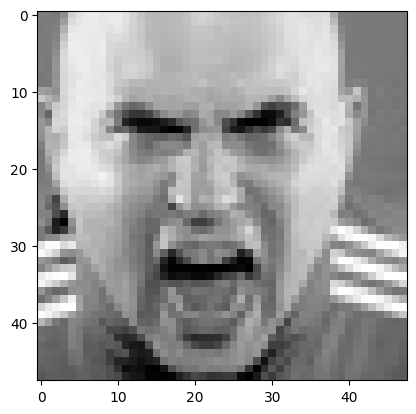

In [49]:
image = 'images/train/angry/22.jpg'
print ("original image is angry")
img = ef(image)
pred = model.predict(img)
pred_label= label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')